# 百日馬拉松-學習精華

#### 請寫一個函式用來計算 Mean Square Error(均方誤差):「誤差」的平方的期望值。
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $
  Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 定義 mean_squared_error 這個函數, 計算並傳回 MSE
def mean_squared_error(y, yp):
    """
    計算 MSE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mse: MSE
    """
    # 主要是下面這一行
    mse = sum((y - yp)**2) / len(y)
    return mse

#### mean absolute error(MAE)(平均絕對誤差): 是絕對誤差的平均值（絕對值後所求的平均值）or能更好地反映預測值誤差的實際情況（幫助測量）,又被稱為 L1 損失 或 L1 範數損失。
[什麼是平均絕對誤差 Mean Absolute Error, MAE？](https://staruphackers.com/%E4%BB%80%E9%BA%BC%E6%98%AF%E5%B9%B3%E5%9D%87%E7%B5%95%E5%B0%8D%E8%AA%A4%E5%B7%AE-mean-absolute-error-mae%EF%BC%9F/)
![Image of Yaktocat](https://staruphackers.com/wp-content/uploads/2019/04/image-4-300x57.png?is-pending-load=1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

### Day004

In [1]:
#從本地資料夾匯入資料
import os
import numpy as np
import pandas as pd
# 設定 data_path
dir_data = './Data/'
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app) #app_train資料型別是DataFrame
print(type(app_train))

Path of read in data: ./Data/application_train.csv
<class 'pandas.core.frame.DataFrame'>


### Day005  如何新建一個 dataframe? 如何讀取其他資料? (非 csv 的資料)

In [1]:
#將網路上的資料抓進python使用
import re
import requests
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"
response = requests.get(target_url)

#伺服器回應的狀態碼
print(response.status_code) #回應200代表正常
# 檢查狀態碼是否 OK
try:    
    if response.status_code == requests.codes.ok:
      print("OK")
except:
    print("伺服器無回應")

data = response.text #<class 'str'>
# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

200
OK
784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [2]:
# 將 txt 轉成 pandas dataframe
import pandas as pd
import requests
import re
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'
response = requests.get(target_url)
data = response.text
data = data.split("\n")  #python內建的split斷行
arrange_data = []

# 利用re正規表示式拿掉亂碼，只留下網址。
#x = re.compile('[a-z0-9]+_[0-9]+') # 去掉n00433802_4955這類的亂碼 #發現連結一部份被拿掉，所以不好用
#x1 = re.compile('\t')

for d in data:
    line = d.split("\t")
    arrange_data.append(line)
#print(type(arrange_data)) <class 'list'>
df = pd.DataFrame(arrange_data)
#print(type(df))  <class 'pandas.core.frame.DataFrame'>
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


In [3]:
# 讀取圖片，請讀取上面 data frame 中的前 5 張圖片
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

def img2arr_fromURLs(url_list, resize = False):
    img_list = []
    for url in url_list:
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
            if resize:
                img = img.resize((256,256))  # 假如 resize，就先統一到 256 x 256
            img = np.array(img)
            img_list.append(img)
        except:# 如果圖片失聯了就 pass。
            #   只有在 response.status_code 為 200 時，才可以取得圖片，若有 404 或其他 status code, 會碰到 Error, 所以
            #我們用 Try 語法避開取不到的狀況。
            pass
    return img_list

import requests
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

Total images that we got: 4 


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

### Day006 EDA: 欄位的資料類型介紹及處理
* Label encoding : 把每個類別 mapping 到某個整數，不會增加新欄位。
* One hot encoding : 為每個類別新增一個欄位，用 0/1 表示是否。
[初學Python手記#3-資料前處理( Label encoding、 One hot encoding)
](https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87)

In [25]:
import os
import numpy as np
import pandas as pd
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv') #組合多個路徑
app_train = pd.read_csv(f_app_train)

sub_train = pd.DataFrame(app_train['WEEKDAY_APPR_PROCESS_START'])
print(sub_train.shape)
sub_train.head()

(307511, 1)


,WEEKDAY_APPR_PROCESS_START
0,WEDNESDAY
1,MONDAY
2,MONDAY
3,WEDNESDAY
4,THURSDAY


In [26]:
# One Hot encoding 方法有兩種
'''
一. pd.get_dummies() : pandas 中的 one hot encoding 非常方便，一行程式碼就搞定。
二. from sklearn.preprocessing import OneHotEncoder
''' 
# pd.get_dummies()
x = pd.get_dummies(sub_train)
print(x['WEEKDAY_APPR_PROCESS_START_MONDAY'].head())
print(x['WEEKDAY_APPR_PROCESS_START_WEDNESDAY'].head())
print(x['WEEKDAY_APPR_PROCESS_START_THURSDAY'].head())

0    0
1    1
2    1
3    0
4    0
Name: WEEKDAY_APPR_PROCESS_START_MONDAY, dtype: uint8
0    1
1    0
2    0
3    1
4    0
Name: WEEKDAY_APPR_PROCESS_START_WEDNESDAY, dtype: uint8
0    0
1    0
2    0
3    0
4    1
Name: WEEKDAY_APPR_PROCESS_START_THURSDAY, dtype: uint8


In [27]:
# Label encoding
# 將 Country欄的字串轉換成數字(進行編碼)，這樣才能套入數學模型進行運算。
import numpy as np
import pandas as pd
country=['Taiwan','Australia','Ireland','Australia','Ireland','Taiwan']
age=[25,30,45,35,22,36]
salary=[20000,32000,59000,60000,43000,52000]
dic={'Country':country,'Age':age,'Salary':salary}
data=pd.DataFrame(dic)
data

,Country,Age,Salary
0,Taiwan,25,20000
1,Australia,30,32000
2,Ireland,45,59000
3,Australia,35,60000
4,Ireland,22,43000
5,Taiwan,36,52000


In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_le=pd.DataFrame(dic)
data_le['Country'] = labelencoder.fit_transform(data_le['Country'])
data_le

,Country,Age,Salary
0,2,25,20000
1,0,30,32000
2,1,45,59000
3,0,35,60000
4,1,22,43000
5,2,36,52000


### Day007 特徵類型
> * 資料中最常⾒見見的特徵類型是 "數值型特徵" 與 '類別型特徵' ，雖然還有二元特徵、排序型特徵、時間型特徵等多種特徵類型，但仍以前兩兩者為主。
* 數值型特徵：最容易易轉成特徵，但需要注意很多細節。
* 類別型特徵：通常⼀一種類別對應⼀一種分數，問題在如何對應。
* 時間型特徵：特殊之處在於有週期性。
* 上述三種特徵，會在之後的課程講述對應的特徵⼯工程
- df[int_features].mean() 平均
- df[int_features].max()  最大
- df[int_features].nunique() 相異值

In [36]:
# 如何秀出指定欄位(column)的內容，方便做後續的特徵工程處理。
# 載入基本套件
import pandas as pd
import numpy as np

# 讀取訓練與測試資料
data_path = 'Data007/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')
df_train.shape

(891, 12)

In [37]:
# 重組資料成為訓練 / 預測用格式
# 訓練資料需要 train_X, train_Y / 預測輸出需要 ids(識別每個預測值), test_X
# 在此先抽離出 train_Y 與 ids, 而先將 train_X, test_X 該有的資料合併成 df, 先作特徵工程
train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
print(df.shape)
df.head()

(1309, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
# 秀出資料欄位的類型與數量
# df.dtypes : 轉成以欄位為 index, 類別(type)為 value 的 DataFrame
# .reset_index() : 預設是將原本的 index 轉成一個新的欄位, 如果不須保留 index, 則通常會寫成 .reset_index(drop=True)
# groupby() : 將資料依照自己要的column分組。  aggregate : 計算次數。
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

,Column Type,Count
0,int64,3
1,float64,2
2,object,5


In [39]:
#確定只有 int64, float64, object 三種類型後, 分別將欄位名稱存於三個 list 中
int_features = []
float_features = []
object_features = []
# .dtypes(欄位類型), .columns(欄位名稱) 是 DataFrame 提供的兩個方法, 這裡順便展示一下 for 與 zip 搭配的用法
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)
# 這邊採用的寫法稱為 f-string, 是 Python 3.6.2 以後版本才出現的
# 如果無法執行, 則需要更新到這個版本之後, 或自行將程式改寫為 str.format 形式
# 改寫方式可以參考 https://blog.louie.lu/2017/08/08/outdate-python-string-format-and-fstring/
print(f'{len(int_features)} Integer Features : {int_features}\n')
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

3 Integer Features : ['Pclass', 'SibSp', 'Parch']

2 Float Features : ['Age', 'Fare']

5 Object Features : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [40]:
#這樣就可以單獨秀出特定類型的欄位集合, 方便做後續的特徵工程處理
df[float_features].head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [60]:
# 如何簡單的顯示出所有包含nan的列?
# any()
# isnull = isna
pd.isna(df['Cabin'])#指定某一列查看缺失值(nan)。True表示缺失
#df.isna().any(axis=1)


0       True
1      False
2       True
3      False
4       True
5       True
6      False
7       True
8       True
9       True
10     False
11     False
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21     False
22      True
23     False
24      True
25      True
26      True
27     False
28      True
29      True
       ...  
388     True
389     True
390    False
391    False
392     True
393     True
394     True
395    False
396     True
397    False
398     True
399     True
400    False
401     True
402     True
403     True
404    False
405    False
406     True
407    False
408     True
409     True
410     True
411    False
412     True
413     True
414    False
415     True
416     True
417     True
Name: Cabin, Length: 1309, dtype: bool

### Day008 EDA資料分佈
長方圖

In [14]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './Data/'

f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

import matplotlib.pyplot as plt
%matplotlib inline 
# 魔法函数（Magic Functions），可以省略掉plt.show()的步驟。

app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Text(0.5, 0, 'AMT_INCOME_TOTAL')

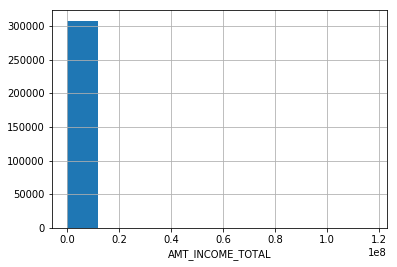

In [16]:
app_train['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')

### 注意到該欄位的最大值和 75% 百分位數的值有異常大的差距，所以直接畫直方圖會看不出所以然來，可以先過濾掉再重新畫圖來看

Text(0.5, 0, 'AMT_INCOME_TOTAL')

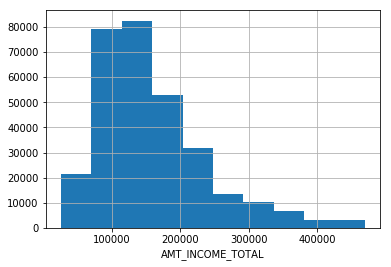

In [19]:
# 下面這一行看不懂
'''
app_train['AMT_INCOME_TOTAL'] < app_train['AMT_INCOME_TOTAL'].quantile(0.99)
=> 這一段在比較 AMT_INCOME_TOTAL 欄位是否小於 99 分位數，會是一個 Ture/False 的 Series

app_train.loc[ ... ]
=> 這一段把上面那個 Ture/False 的 Series 當成條件，會選出 AMT_INCOME_TOTAL 欄位是否小於 99 分位數 的資料

app_train.loc[ ... ]['AMT_INCOME_TOTAL']
=> 從符合條件的資料中，取出 AMT_INCOME_TOTAL 欄位

app_train.loc[ ... ]['AMT_INCOME_TOTAL'].hist()
=> 畫成長條圖
'''
app_train.loc[app_train['AMT_INCOME_TOTAL']<app_train['AMT_INCOME_TOTAL'].quantile(0.99)]['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')

### Day009 EDA: Outlier 及處理
* Outlier(例外值、異常值)可能出現原因 : 年齡是-1或999，錯誤紀錄、系統性錯誤。
* 檢查Outlier的流程與方法 : 盡可能確認每個欄位的意義。透過檢查數值範圍(五值、平均數、標準差)，或是繪製散點圖(scatter)、分布圖(histogram)或其他圖檢查是否有異常。
* 對Outlier的處理方法 : 新增欄欄位⽤用以紀錄異異常與否、填補(取代)、視情況以中位數, Min, Max 或平均數填補(有時會⽤用 NA)。
[Ways to Detect and Remove the Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

In [ ]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data/'

# import matplotlib.pyplot as plt 繪圖用法
[莫煩python matplotlib 3](https://morvanzhou.github.io/tutorials/data-manipulation/plt/)
[Matplotlib 基礎入門](https://www.happycoder.org/2017/10/13/python-data-science-and-machine-learning-matplotlib-tutorial/)

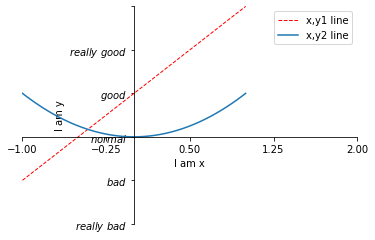

In [42]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-1,1,50) #範圍是(-1,1)，個數 50個。
y1 = 2*x+1
y2 = x**2
plt.xlim(-1,2) #x軸座標範圍
plt.ylim(-2,3) #y軸座標範圍
plt.xlabel('I am x')  #x軸名稱
plt.ylabel('I am y')  #y軸名稱
plt.xticks(np.linspace(-1,2,5)) #設置x軸刻度
plt.yticks([-2,-1,0,1,2,3],[r'$really\ bad$', r'$bad$', r'$normal$', r'$good$', r'$really\ good$'])

#設置邊框顏色
ax = plt.gca()
ax.spines['right'].set_color('none') #設定邊框顏色
ax.spines['top'].set_color('none')   #設定邊框顏色
ax.xaxis.set_ticks_position('bottom') #設定x軸座標的位置top,bottom,both,default,none
ax.spines['bottom'].set_position(('data', 0))#.spines設置邊框;.set_position设置边框位置（位置所有属性：outward，axes，data）
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

l1 = plt.plot(x, y1, color='red', linewidth=1.0, linestyle='--', label='x,y1 line')  #繪製x, y1圖
l2 = plt.plot(x, y2, label='x,y2 line')  #繪製x, y2圖

plt.legend(loc='upper right')#顯示出label
#plt.legend(handles=[l1, l2], labels=['l1','l2'], loc='best')#loc有多種參數，'best'表示自動分配最佳位置，其餘如下:
''' 'best' : 0,          
 'upper right'  : 1,
 'upper left'   : 2,
 'lower left'   : 3,
 'lower right'  : 4,
 'right'        : 5,
 'center left'  : 6,
 'center right' : 7,
 'lower center' : 8,
 'upper center' : 9,
 'center'       : 10,
'''
plt.show()     #顯示圖

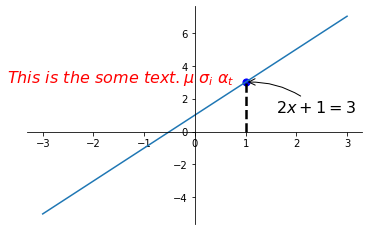

In [75]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3, 3, 50)
y = 2*x + 1

#設定座標位置
ax = plt.gca()
ax.spines['right'].set_color('none') #不顯示右邊的線
ax.spines['top'].set_color('none')   #不顯示上面的線
ax.xaxis.set_ticks_position('bottom')#x軸標示在下面
ax.spines['bottom'].set_position(('data', 0))#底線歸0
ax.yaxis.set_ticks_position('left')  #y軸標示在左邊
ax.spines['left'].set_position(('data', 0))  #左線歸0

#畫虛線 & 點
x0 = 1
y0 = 2*x0+1
plt.plot([x0,x0],[0,y0],'k--',linewidth=2.5) #虛線
plt.scatter([x0],[y0], s=50, color='b') #畫dot

#添加標註annotate  #其中xytext=(+30, -30),textcoords='offset points'表示位置的描述與xy偏差值
plt.annotate(r'$2x+1=%s$' % y0, xy=(x0, y0), xycoords='data', xytext=(+30, -30),
             textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2"))

#添加注釋text # -3.7, 3是text位置，空格需要用到轉字符\，fontdict設置字體格式
plt.text(-3.7, 3, r'$This\ is\ the\ some\ text. \mu\ \sigma_i\ \alpha_t$',
         fontdict={'size': 16, 'color': 'r'} )

plt.figure(num=1, figsize=(8, 5)) #圖的大小
plt.plot(x, y)
plt.show()

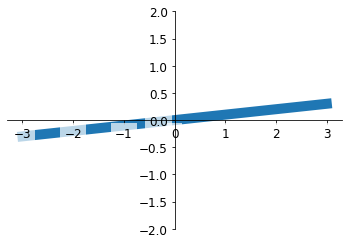

In [77]:
# tick能見度 (如果線擋到字的時候)
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3, 3, 50)
y = 0.1*x

plt.figure() #不知道用途
# 在 plt 2.0.2 或更高的版本中, 设置 zorder 给 plot 在 z 轴方向排序
plt.plot(x, y, linewidth=10, zorder=1) #zorder???
plt.ylim(-2, 2)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    # 在 plt 2.0.2 或更高的版本中, 设置 zorder 给 plot 在 z 轴方向排序
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.7, zorder=2))
plt.show()
#label.set_fontsize(12)重新調整字的大小，bbox:調整box的相關參數，facecolor調整box前景色，edgecolor設置邊框，alpha設置透明度。

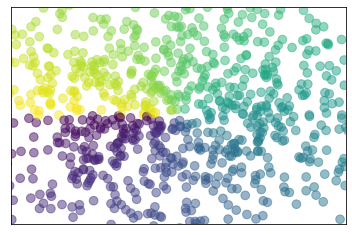

In [9]:
#散點圖 scatter
import matplotlib.pyplot as plt
import numpy as np

n = 1024    # data size
X = np.random.normal(0, 1, n) # 每一个点的X值
Y = np.random.normal(0, 1, n) # 每一个点的Y值
T = np.arctan2(Y,X) # for color value

#輸入X,Y作為location, size=75,顏色為T,color map用默認值,透明度為50%。
#x軸顯示範圍定位(-1.5, 1.5),並用xtick()函數來隱藏x坐標軸,y同理。
plt.scatter(X, Y, s=75, c=T, alpha=.5)

plt.xlim(-1.5, 1.5)
plt.xticks(())  # ignore xticks
plt.ylim(-1.5, 1.5)
plt.yticks(())  # ignore yticks

plt.show()

[zip與for迴圈](https://blog.gtwang.org/programming/python-iterate-through-multiple-lists-in-parallel/)

In [14]:
#在 Python 中若要將兩個 list 以迴圈的方式一次各取一個元素出來處理，可以使用 zip 打包之後配合 for 迴圈來處理：
# 第一個 List
names = ["A", "B", "C"]

# 第二個 List
values = [11, 23, 46]

# 使用 zip 同時迭代兩個 List
for x, y in zip(names, values):
  print(x, y)
#這裡的 zip(names, values) 會將 names 與 values 的每個元素以一對一的方式配對起來，組成一個新的迭代器，然後交給 for 迴圈進行迭代
#，所以每一次迭代時所取的 x 值會來自於 names，而 y 則會來自於 values，結果就會像這樣：

A 11
B 23
C 46


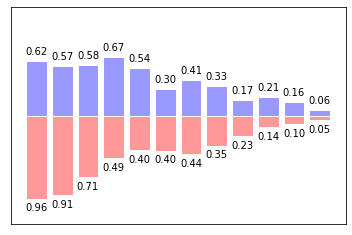

In [13]:
# Bar 柱狀圖
#向上下分別生成12個數據，X為0~11的整數，Y是相應的"均勻分布"的隨機數據。
#使用的函數式plt.bar,參數為X和Y
import matplotlib.pyplot as plt
import numpy as np

n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

#facecolor設定顏色，edgecolor設定邊框顏色為白色
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

# 使用plt.text分別在柱體上方(下方)加上數值，用 %.2f保留兩位小數，ha='center'橫向中居對齊，va='bottom'縱向底部(頂部)對齊
for x, y in zip(X, Y1):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x , y + 0.05, '%.2f' % y, ha='center', va='bottom')
for x, y in zip(X, Y2):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x , -y - 0.05, '%.2f' % y, ha='center', va='top')

plt.xlim(-1, n)
plt.xticks(())# ignore xticks
plt.ylim(-1.25, 1.25)
plt.yticks(())# ignore xticks

plt.show()

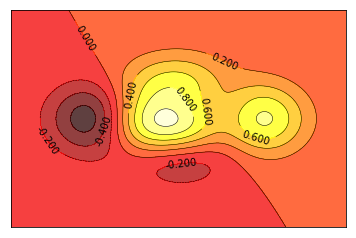

In [6]:
# Contours 等高線圖
import matplotlib.pyplot as plt
import numpy as np

def f(x,y):
    # the height function 高度值使用一個函數
    return (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y) # X,Y是由 x,y產生的矩陣。 詳細: https://www.cnblogs.com/lemonbit/p/7593898.html

#顏色填充
# use plt.contourf to filling contours
# X, Y and value for (X,Y) point，X和Y必須都為二維且形狀與Z相同 (e.g. created via numpy.meshgrid)
# 透明度0.75，f(x,y)值對應到color map的暖色組中尋找對應顏色。
plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot) 

# 等高線繪製
# use plt.contour to add contour lines  # 線條黑色，線條寬度0.5
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidths=.5)

#添加高度數字   inline控制是否將Label畫在線裡面，字體大小為10。
plt.clabel(C, inline=True, fontsize=10)
plt.xticks(())# ignore xticks
plt.yticks(())# ignore xticks

plt.show()

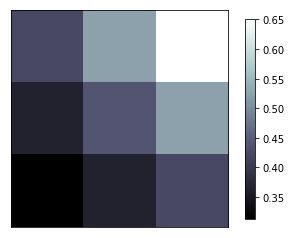

In [13]:
# 隨機矩陣畫圖 :如何使用matplotlib中打印出圖像，下列使用3x3的2D-array來表示點的顏色，每一個點就是一個 pixel。
import matplotlib.pyplot as plt
import numpy as np

a = np.array([0.313660827978, 0.365348418405, 0.423733120134,
              0.365348418405, 0.439599930621, 0.525083754405,
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)

# interpolation內插法，cmap(顏色圖譜colormap，可去網路找ex:autumn、copper)，origin原點位置為lower(upper為默認)
# 官網有關於不同內插法用法 https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html 
plt.imshow(a, interpolation='nearest', cmap='bone', origin='lower')

# colorbar
# shrink=.92使colorbar長度為原來的92%
plt.colorbar(shrink=.92)

plt.xticks(())# ignore xticks
plt.yticks(())# ignore xticks

plt.show()

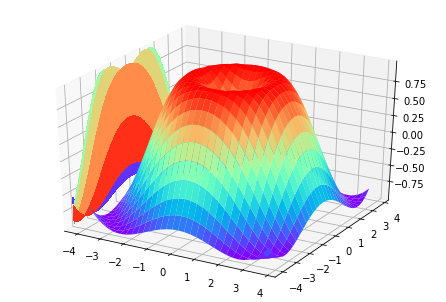

In [33]:
# 3D圖
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#先定義一個圖像窗口，在窗口上添加3D坐標軸
fig = plt.figure()
ax = Axes3D(fig)

#X,Y值做成網格，並定義一個高度函數Z
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格
R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z = np.sin(R)

# 做出一個三圍曲面，並將一個colormap rainbow填充顏色，之後將三維圖像投影到XY平面上做一個等高線圖。
#rstride、cstride分別代表row、column的跨度。
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))


# 投影
# zdir=x，表示會投影到XZ平面。
ax.contourf(X, Y, Z, zdir='x', offset=-4.5, cmap=plt.get_cmap('rainbow'))

plt.show()

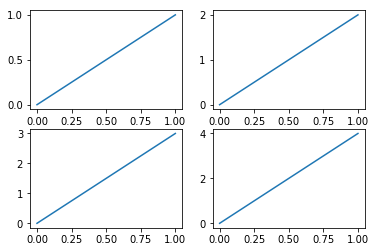

In [37]:
# subplot 多合一顯示 :matplotlib
import matplotlib.pyplot as plt

# 使用plt.figure創建一個圖像窗口。
plt.figure()

# plt.subplot來創建小圖，放在一張大圖裡面顯示。
#表示將整個圖像窗口分為2行2列，當前位置為1，plt.plot([0,1],[0,1])在第一個位置創建一個小圖。
plt.subplot(2,2,1)
plt.plot([0,1],[0,1])

# plt.subplot(2,2,2)，當前位置2，plt.plot([0,1],[0,2])在第二個位置創建小圖。
plt.subplot(2,2,2)
plt.plot([0,1],[0,2])

plt.subplot(2,2,3)
plt.plot([0,1],[0,3])

plt.subplot(2,2,4)
plt.plot([0,1],[0,4])

plt.show()

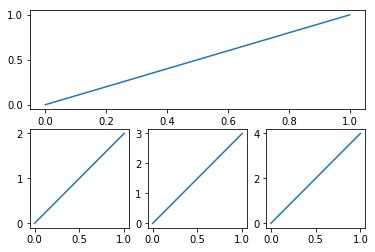

In [40]:
# 不均勻中間圖 :展示不同大小的圖。
plt.subplot(2,1,1) #將整個圖像窗口分為2行1列，當前位置1，
plt.plot([0,1],[0,1])

# plt.subplot(2,3,4)將整個圖像窗口分為2行3，當前位置為4
plt.subplot(2,3,4)
plt.plot([0,1],[0,2])
#   這裡需要解釋一下為什麼第4個位置放在第2個小圖上。 上一步中使用plt.subplot(2,1,1)将整个图像窗口分为2行1列，
#第1个小图占用了第1个位置, 也就是整个第1行. 这一步中使用plt.subplot(2,3,4)将整个图像窗口分为2行3列, 于是整
#个图像窗口的第1行就变成了3列, 也就是成了3个位置, 于是第2行的第1个位置是整个图像窗口的第4个位置.

plt.subplot(235)
plt.plot([0,1],[0,3])

plt.subplot(236)
plt.plot([0,1],[0,4])

plt.show()

# python 入門到分析股市 系列
參考網址:https://ithelp.ithome.com.tw/users/20111390/ironman/1791

Os
-
os套件是Python中常用的文件和目錄的操作，在os中常用的函式
名稱	說明
system()	執行系統command
mkdir(E)	建立E目錄，如果E目錄已存在會發生錯誤
rmdir(E)	移除E目錄
remove(E)	移除E檔案，如果E是目錄就會出錯
getcwd()	取得目前所在路徑
rename(src, dst)	將 src 改名為 dst

os.path有以下常用的函式
名稱 | 說明
------------- | -------------
isfile(E) | E檔案是否存在
isdir(E) | E目錄是否存在
join(src, dst) | 拼接目錄，只有拼接，不會建立目錄
exists | 判斷文件或目錄是否存在
getsize | 取得文件大小
abspath | 獲得檔案的絕對路徑

In [6]:
import os
path = "D:\python\crawler"
if os.path.exists(path):
    print(path,"此目錄已存在")
else: 
    os.mkdir(path) #建立目錄

D:\python\crawler 此目錄已存在


In [12]:
import os
file = "D:\\python\\crawler\\test.txt" #要用\\  要加副檔名
print("完整路徑名稱--->",os.path.abspath(file))
print(file,"是否存在--->",os.path.exists(file))
print(file,"檔案大小--->",os.path.getsize(file))

完整路徑名稱---> D:\python\crawler\test.txt
D:\python\crawler\test.txt 是否存在---> True
D:\python\crawler\test.txt 檔案大小---> 0



In [17]:
import os
path = "D:\python\crawler"
for root, dirs, files in os.walk(path):
    for x in files:  #列出檔案
        print("檔案--->",os.path.join(root, x))
    for name in dirs:   #列出資料夾(目錄)
        print("目錄--->",os.path.join(root, name))
    print()

檔案---> D:\python\crawler\test.txt
目錄---> D:\python\crawler\test




open()
-
檔案的輸出和輸入
語法：open(filename, mode)
mode傳入的是字串，第一個字母代表操作，第二個字母代表類型操作的部分
r	讀取
w	寫入。檔案不存在則新增，檔案如果已經存在會被覆蓋
X	寫入。只有當檔案不存在時才可寫入
a	在檔案結尾處寫入

類型
文字	說明
t	文字
b	二進位

In [26]:
content = '''Python first   
測試中文
第三行
'''
# wt寫入模式
f = open('D:\\python\\crawler\\test.txt','wt') #寫入模式，檔案如果已經存在會被覆蓋
f.write(content)
f.close()

# r讀取模式
f2 = open('D:\\python\\crawler\\test.txt','r')
for line in f2:
    print(line, end = "")
f2.close()

Python first   
測試中文
第三行


CSV
-
純文字的方式儲存檔案資料，已逗號分隔資料

In [32]:
import csv
#newline='' 參數，這是為了讓資料中包含的換行字元可以正確被解析，所以建議在讀取 csv 檔案時都固定加入這個參數。
with open('D:\\python\\crawler\\test_csv.csv', 'w', newline='') as csvfile: #沒有檔案則會建立一個
    writer = csv.writer(csvfile) #建立CSV檔寫入器
    writer.writerow(['股票', '收盤價', '單量'])
    writer.writerow(['台積電', 238, 23])
    writer.writerow(['大同', 40, 121])
    writer.writerow(['華新科', 174, 105])
#----列印出寫入內容----
with open('D:\\python\\crawler\\test_csv.csv', 'r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for x in reader:
        print(x)

['股票', '收盤價', '單量']
['台積電', '238', '23']
['大同', '40', '121']
['華新科', '174', '105']


XML
-
可延伸標記式語言（英語：Extensible Markup Language，簡稱：XML）是一種標記式語言。標記指電腦所能理解的資訊符號，通過此種標記，電腦之間可以處理包含各種資訊的文章等。
<stock>
  <tsmc>
   <close name="收盤價">238</close>
   <buy name="單量">23</buy>
  </tsmc>
</stock>

參考網站: https://hackmd.io/@FNiPEDOTRa-Lt4dEdBSMfw/rJYlKYpml?type=view

In [47]:
#建立 XML
import xml.etree.ElementTree as ET
data = ET.Element('stock') #建立節點stock
tsmc = ET.SubElement(data, 'tsmc')  # 在stock節點底下建立子節點
close = ET.SubElement(tsmc, 'close')
buy = ET.SubElement(tsmc, 'buy')
close.set('name', '收盤價')  # 設定節點的名稱
buy.set('name', '單量')
close.text = '238'
buy.text = '23'
#寫入 XML
mydata = ET.tostring(data)
myfile = open('data_xml.xml', 'wb')
myfile.write(mydata)  
myfile.close()
#讀取 XML 的方法
tree = ET.parse('data_xml.xml')  
root = tree.getroot()

for elem in root:  
    for subelem in elem:
        print(subelem.get('name'),"----->",subelem.attrib)

for child in root:
    for x in child:
        print(x.tag, x.attrib)

print(root[0][0].text) #238
print(root[0][1].text) #23

收盤價 -----> {'name': '收盤價'}
單量 -----> {'name': '單量'}
close {'name': '收盤價'}
buy {'name': '單量'}
238
23


# JSON
-
JSON（JavaScript Object Notation，JavaScript物件表示法）
輕量級的資料交換語言，該語言以易於讓人閱讀的文字為基礎，用來傳輸由屬性值或者序列性的值組成的資料物件。
{
  "stock": [
    {
      "name": "台積電",
      "close": "238",
      "buy": "23"
    },
    {
      "name": "大同",
      "close": "40",
      "buy": "121"
    },
    {
      "name": "華新科",
      "close": "174",
      "buy": "105"
    }
  ]
}

json.dumps() json.dump  json.loads()  json.load()差異
https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/356804/

In [5]:
#建立 json
import json
data = {}
data['stock'] = []
data['stock'].append({  
    'name': '台積電',
    'close': '238',
    'buy': '23'
})
data['stock'].append({  
    'name': '大同',
    'close': '40',
    'buy': '121'
})
data['stock'].append({  
    'name': '華新科',
    'close': '174',
    'buy': '105'
})

#寫入 json
with open('D:\\python\\crawler\\test_json.json', 'w') as outfile:  
    json.dump(data, outfile,ensure_ascii=False,indent=2)
    
#讀取 json
with open('D:\\python\\crawler\\test_json.json','r') as json_file:
    data=json.load(json_file)
    for x in data['stock']:
        print('股票' + x['name'])
        print('收盤價' + x['close'])
        print('單量' + x['buy'])
        print('')
print(data['stock'])

股票台積電
收盤價238
單量23

股票大同
收盤價40
單量121

股票華新科
收盤價174
單量105

[{'name': '台積電', 'close': '238', 'buy': '23'}, {'name': '大同', 'close': '40', 'buy': '121'}, {'name': '華新科', 'close': '174', 'buy': '105'}]


YAML
-
是一個可讀性高，用來表達資料序列化的格式。YAML參考了其他多種語言，包括：C語言、Python、Perl，並從XML、電子郵件的資料格式（RFC 2822）中獲得靈感。

stock:
  buy: '121'
  close: '238'
  name: '台積電'

In [16]:
#建立 YAML
import yaml
cfg = {
    "stock": dict(
    name = '台積電',
    close = '238',
    but = '121'
    )
}

#寫入 YAML
with open('D:\\python\\crawler\\test_yaml.yaml','w') as outfile:
    yaml.dump(cfg, outfile, default_flow_style=False, allow_unicode=True)
    
#讀取 YAML
with open("D:\\python\\crawler\\test_yaml.yaml", 'r') as yml:
    contents = yaml.safe_load(yml)
    print("取得股票--->",contents['stock'])

取得股票---> {'but': '121', 'close': '238', 'name': '台積電'}


# 數據統計
- Numpy
Numberical Python的簡稱，提供一個高效的介面，用來在大量資料緩衝區中進行儲存和操作。某些時候Numpy的陣列就像是Python內建的list型態，但Numpy提供更有效率的儲存和操作。Numpy陣列幾乎是Python整個資料科學生態的核心。

- Pandas
提供高效率，資料更容易使用的架構，且讓資料更容易分析的開源程式碼。想像Pandas是Numpy陣列的加強版。

- SciPy
科學計算的另一個核心庫是 SciPy。它基於 NumPy，其功能也因此得到了擴展。SciPy 主數據結構又是一個多維數組，由 Numpy 實現。這個軟件包包含了幫助解決線性代數、概率論、積分計算和許多其他任務的工具。此外，SciPy 還封裝了許多新的 BLAS 和 LAPACK 函數。

- StatsModels
Statsmodels 是一個 Python 模塊，它為統計數據分析提供了許多機會，例如統計模型估計、執行統計測試等。在它的幫助下，你可以實現許多機器學習方法並探索不同的繪圖可能性。

# 視覺化
- Matplotlib
Matplotlib 是一個用於創建二維圖和圖形的底層庫。藉由它的幫助，你可以構建各種不同的圖標，從直方圖和散點圖到費笛卡爾座標圖。此外，有許多流行的繪圖庫被設計為與matplotlib結合使用。

- Seaborn
Seaborn 本質上是一個基於 matplotlib 庫的高級 API。它包含更適合處理圖表的默認設置。此外，還有豐富的可視化庫，包括一些複雜類型，如時間串行、聯合分佈圖（jointplots）和小提琴圖（violin diagrams）。

Numpy
-
建立ndarray
numpy有很多內建函式可以建立ndarray，現在將相同性質的函式放在一起介紹建立值全部都一樣的陣列。

# 建立值全部都一樣的陣列

zeros()：產生全部為零的陣列
ones()：全部為1的陣列
empty()：無初始值的陣列
語法：zeros(shape, dtype='dtype',*args)，zeros()可改成ones()或empty()

In [3]:
import numpy as np
numpy_zeros = np.zeros(10, dtype=int) #建立一個內容為0，長度為10的整數陣列
numpy_ones = np.ones((3,5), dtype=float) #建立一個內容為1 3x5的浮點數陣列
numpy_empty = np.empty((3,2))  #建立一個內容為1 3x2的無初始職陣列
numpy_full = np.full((4,2), 2.2) #建立一個內容為2.2 4x2的浮點數陣列
print("numpy_zeros :", numpy_zeros)
print("numpy_ones :", numpy_ones)
print("numpy_empty :", numpy_empty)
print("numpy_full :", numpy_full)

numpy_zeros : [0 0 0 0 0 0 0 0 0 0]
numpy_ones : [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
numpy_empty : [[0. 0.]
 [0. 0.]
 [0. 0.]]
numpy_full : [[2.2 2.2]
 [2.2 2.2]
 [2.2 2.2]
 [2.2 2.2]]


# 建立等差數列
arange(start, stop, step, dtype=None)：step為等差值
linspace(start, stop, num, endpoint=True)：num代表陣列的大小

In [8]:
import numpy as np
numpy_arange = np.arange(0,20,2)    #建立一個依序填滿的陣列 0~20間格為2
numpy_linspace = np.linspace(0,1,5) #建立一個5個值的陣列，在0到1間平均分布
print("numpy_arange : ", numpy_arange)
print("numpy_linspace : ", numpy_linspace)

numpy_arange :  [ 0  2  4  6  8 10 12 14 16 18]
numpy_linspace :  [0.   0.25 0.5  0.75 1.  ]


# 建立隨機數列 np.random
* 建立0~1的浮點數
random.random(size)
random.ranf(size)
random.sample(size)

In [13]:
import numpy as np
ironman_random = np.random.random((3,3))  #建立一個 3*3 陣列，在0到1間亂數值
ironman_ranf = np.random.ranf((5))        #建立一個 5   陣列，在0到1間亂數值
ironman_sample = np.random.sample((2,3))  #建立一個 2*3 陣列，在0到1間亂數值

print('ironman_random---->\n',ironman_random)
print('ironman_ranf---->\n', ironman_ranf)
print('ironman_sample---->\n', ironman_sample)

ironman_random---->
 [[0.07328027 0.61536492 0.29593639]
 [0.84198502 0.56163696 0.42052628]
 [0.66454114 0.30536582 0.91329337]]
ironman_ranf---->
 [0.1207977  0.43427394 0.5270635  0.74162884 0.83526283]
ironman_sample---->
 [[0.4862598  0.29648776 0.44932615]
 [0.91624241 0.61371747 0.78608253]]


# 建立常態分布又稱為高斯分布
random.normal(loc='loc', scale='scale', size=None)：loc為平均值、scale為標準差

In [9]:
import numpy as np
ironman_normal = np.random.normal(0,1,(3,3)) #建立一個3*3陣列，內容為常態分佈的亂數值 平均0，標準差1

print('ironman_normal---->\n', ironman_normal)

ironman_normal---->
 [[ 0.43207448  0.29417708  0.33923426]
 [-0.81467528  1.46648381  0.59443173]
 [-0.84558764 -0.31390438 -0.35762769]]


# 建立隨機整數陣列
random.randint(low, high, size)

In [16]:
ironman_randint = np.random.randint(0,10,(3,3)) #建立一個3*3陣列，內容介於0到10的整數

print('ironman_randint---->\n', ironman_randint)

ironman_randint---->
 [[7 9 6]
 [3 1 1]
 [7 7 6]]


# Numpy 陣列屬性
剛剛示範了如何建立陣列，現在來看關於陣列，有什麼基本屬性可以使用。

陣列屬性
ndim()：取得陣列的維度數量
shape()：陣列的形狀
size()：陣列的數量
dtype()：資料型態
itemsize()：陣列中元素的大小(位元組為單位)
nbytes()：陣列的大小(位元組為單位) 一般來說 nbytes = itemsize * size

In [19]:
# ndim()
import numpy as np
ironman_x1 = np.random.randint(10, size=6)         #一維陣列
ironman_x2 = np.random.randint(10, size=(3,4))     #二維陣列
ironman_x3 = np.random.randint(10, size=(2,3,2))   #三維陣列

print("ironman_x1 ndim:     ", ironman_x1.ndim)
print("ironman_x2 ndim:     ", ironman_x2.ndim)
print("ironman_x3 ndim:     ", ironman_x3.ndim)

ironman_x1 ndim:      1
ironman_x2 ndim:      2
ironman_x3 ndim:      3


In [23]:
# size()
#先建立三個陣列各別是一維陣列、二維陣列、三維陣列，再用此三個陣列來顯示屬性。
import numpy as np
ironman_x1 = np.random.randint(10, size=6)         #一維陣列
ironman_x2 = np.random.randint(10, size=(3,4))     #二維陣列
ironman_x3 = np.random.randint(10, size=(2,3,4))   #三維陣列

print("ironman_x1---->", ironman_x1)
print("ironman_x2---->\n", ironman_x2)
print("ironman_x3---->\n", ironman_x3)

ironman_x1----> [9 8 4 1 5 7]
ironman_x2---->
 [[4 0 4 3]
 [9 6 3 0]
 [8 6 0 2]]
ironman_x3---->
 [[[6 0 7 7]
  [1 3 5 7]
  [9 3 0 2]]

 [[1 4 7 3]
  [7 8 7 6]
  [2 5 7 0]]]


In [20]:
# shape()
import numpy as np
print("ironman_x1 shape:     ", ironman_x1.shape)
print("ironman_x2 shape:     ", ironman_x2.shape)
print("ironman_x3 shape:     ", ironman_x3.shape)

ironman_x1 shape:      (6,)
ironman_x2 shape:      (3, 4)
ironman_x3 shape:      (2, 3, 2)


In [24]:
# size()
import numpy as np
print("ironman_x1 size:     ", ironman_x1.size)  # 6 x 1 = 6
print("ironman_x2 size:     ", ironman_x2.size)  # 3 x 4 = 12
print("ironman_x3 size:     ", ironman_x3.size)  # 2 x 3 x 4 = 24

ironman_x1 size:      6
ironman_x2 size:      12
ironman_x3 size:      24


In [25]:
# dtype()
import numpy as np
print("ironman_x1 dtype:     ", ironman_x1.dtype)
print("ironman_x2 dtype:     ", ironman_x2.dtype)
print("ironman_x3 dtype:     ", ironman_x3.dtype)

ironman_x1 dtype:      int32
ironman_x2 dtype:      int32
ironman_x3 dtype:      int32


In [26]:
# itemsize()  陣列中元素的大小(位元組為單位)
import numpy as np
print("ironman_x1 itemsize:     ", ironman_x1.itemsize)
print("ironman_x2 itemsize:     ", ironman_x2.itemsize)
print("ironman_x3 itemsize:     ", ironman_x3.itemsize)

ironman_x1 itemsize:      4
ironman_x2 itemsize:      4
ironman_x3 itemsize:      4


In [28]:
# nbytes()  陣列的大小(位元組為單位) 一般來說 nbytes = itemsize * size
import numpy as np
print("ironman_x1 nbytes:     ", ironman_x1.nbytes)
print("ironman_x2 nbytes:     ", ironman_x2.nbytes)
print("ironman_x3 nbytes:     ", ironman_x3.nbytes)

ironman_x1 nbytes:      24
ironman_x2 nbytes:      48
ironman_x3 nbytes:      96


# 陣列索引
使用陣列的索引來取值和修改值

In [34]:
import numpy as np
ironman_x1 = np.random.randint(10, size=6)         #一維陣列
ironman_x2 = np.random.randint(10, size=(3,4))     #二維陣列
ironman_x3 = np.random.randint(10, size=(2,3,2))   #三維陣列
print("ironman_x1---->\n", ironman_x1)
print("ironman_x2---->\n", ironman_x2)
print("ironman_x3---->\n", ironman_x3)

# 取得陣列值
print("ironman_x1[2]--------->", ironman_x1[2])
print("ironman_x2[2,2]------->", ironman_x2[2,2])
print("ironman_x3[1,1,1]----->", ironman_x3[1,1,1])
# 修改陣列值
ironman_x1[2] = 7
ironman_x2[2,2] = 4
ironman_x3[1,1,1] = 3
print("ironman_x1[2]--------->", ironman_x1[2])
print("ironman_x2[2,2]------->", ironman_x2[2,2])
print("ironman_x3[1,1,1]----->", ironman_x3[1,1,1])

ironman_x1---->
 [6 5 6 4 1 3]
ironman_x2---->
 [[2 6 7 4]
 [2 4 3 3]
 [3 6 3 6]]
ironman_x3---->
 [[[4 8]
  [1 5]
  [3 3]]

 [[0 1]
  [3 6]
  [6 6]]]
ironman_x1[2]---------> 6
ironman_x2[2,2]-------> 3
ironman_x3[1,1,1]-----> 6
ironman_x1[2]---------> 7
ironman_x2[2,2]-------> 4
ironman_x3[1,1,1]-----> 3


# 陣列切片
可以使用切片的方式來取得元素和修改元素

In [2]:
# 一維陣列
import numpy as np
ironman_x4 = np.arange(10)
print('ironman_x4----------->', ironman_x4)
print('ironman_x4[:5]------->',ironman_x4[:5])      # 前面5個元素
print('ironman_x4[5:]------->',ironman_x4[5:])      # index5 之後的元素
print('ironman_x4[4:7]------>',ironman_x4[4:7])     # index 4~(7-1) 的元素
print('ironman_x4[::2]------>',ironman_x4[::2])     # 間隔2的所有元素
print('ironman_x4[1::2]----->',ironman_x4[1::2])    # index1開始 間隔2的所有元素
print('ironman_x4[::-1]----->',ironman_x4[::-1])    # 反轉元素

ironman_x4-----------> [0 1 2 3 4 5 6 7 8 9]
ironman_x4[:5]-------> [0 1 2 3 4]
ironman_x4[5:]-------> [5 6 7 8 9]
ironman_x4[4:7]------> [4 5 6]
ironman_x4[::2]------> [0 2 4 6 8]
ironman_x4[1::2]-----> [1 3 5 7 9]
ironman_x4[::-1]-----> [9 8 7 6 5 4 3 2 1 0]


In [3]:
# 二維陣列
import numpy as np
ironman_x5 = np.random.randint(10, size=(3,4))     #二維陣列
print('ironman_x5-------------->\n',ironman_x5)
print('ironman_x5[:2, :3]------>\n',ironman_x5[:2, :3])    # 取得  2列     3欄
print('ironman_x5[:3, ::2]----->\n',ironman_x5[:3, ::2])   # 取得  3列     偶數欄
print('ironman_x5[:,0]--------->\n',ironman_x5[:,0])       #取得 所有列     第(0+1)欄
print('ironman_x5[2,:]--------->\n',ironman_x5[2,:])       #取得 第(2+1)列   所有欄

ironman_x5-------------->
 [[1 6 2 6]
 [2 4 0 2]
 [0 0 4 4]]
ironman_x5[:2, :3]------>
 [[1 6 2]
 [2 4 0]]
ironman_x5[:3, ::2]----->
 [[1 2]
 [2 0]
 [0 4]]
ironman_x5[:,0]--------->
 [1 2 0]
ironman_x5[2,:]--------->
 [0 0 4 4]


# 重塑(reshape)

In [5]:
#示範建立一個一維陣列變成3*1
x = np.array([1,2,3])
print('x:', x)
x_reshape = x.reshape((3,1)) # 透過reshape改變row column
print('x_reshape----->\n', x_reshape)

x: [1 2 3]
x_reshape----->
 [[1]
 [2]
 [3]]


# 串接(concatenate,vstack,hstack)
concatenate()：串接
vstack()：垂直串接
hstack()：水平串接

In [10]:
import numpy as np
x = np.array([1,2,3])
y = np.array([4,5,6])
print('concatenate----->\n',np.concatenate([x,y]))    # 串接陣列
print(np.concatenate([x,y]).shape) # 用shape查看維度
print('vstack----->\n',np.vstack([x,y]))              # 垂直串接
print(np.vstack([x,y]).shape)
print('hstack----->\n',np.hstack([x,y]))              # 水平串接
print(np.hstack([x,y]).shape)

concatenate----->
 [1 2 3 4 5 6]
(6,)
vstack----->
 [[1 2 3]
 [4 5 6]]
(2, 3)
hstack----->
 [1 2 3 4 5 6]
(6,)


# 分割(split,hsplit,vsplit)
split()：分割
vsplit()：垂直分割
hsplit：水平分割

In [16]:
# split()：分割
z = np.array([1,2,3,4,5,6,7,8,9])
print("z---->", z)
z1,z2,z3 = np.split(z,[3,5])
# 分割3個陣列 [index 0~(3-1) ] [ index 3~(5-1)] [index (5~end)]
print("z1---->", z1)
print("z2---->", z2)
print("z3---->", z3)

z----> [1 2 3 4 5 6 7 8 9]
z1----> [1 2 3]
z2----> [4 5]
z3----> [6 7 8 9]


In [17]:
# vsplit()：垂直分割
z = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("z---->\n", z)
print('vsplit----->\n',np.vsplit(z,[2]))    # 垂直分割

z---->
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
vsplit----->
 [array([[1, 2, 3],
       [4, 5, 6]]), array([[7, 8, 9]])]


In [20]:
# hsplit：水平分割
z = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("z---->\n", z)
print('hsplit----->\n',np.hsplit(z,[2]))    # 水平分割

z---->
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
hsplit----->
 [array([[1, 2],
       [4, 5],
       [7, 8]]), array([[3],
       [6],
       [9]])]


Ufuncs
-
Numpy陣列中的計算，許多Ufuncs都是在C程式實作，計算速度比較快，接下來介紹一些比較常用的Ufuncs

# [Day08]Learning Numpy - Ufuncs、broadcasting、運算子

In [23]:
# 絕對值：abs()
x = np.array([-2,-1,0,1,-3])
abs(x)

array([2, 1, 0, 1, 3])

In [26]:
# 三角函數：abs()、cos()、tan()
theta = np.linspace(0, np.pi, 3)  #建立一個角度的陣列  #建立一個3個值的陣列，在0到3.14間平均分布
print('theta---->', theta)
print("sin()---->", np.sin(theta))
print("cos()---->", np.cos(theta))
print("tan()---->", np.tan(theta))

theta----> [0.         1.57079633 3.14159265]
sin()----> [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos()----> [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan()----> [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [30]:
# 指數和對數：exp()、exp2()、power()、log()、log2()、log10()
x = [1,2,9,10, 16]
print("exp()------>", np.exp(x))          # e^x
print("exp2()----->", np.exp2(x))        # 2^x
print("power()---->", np.power(3, x))   # 3^x
print("log()------>", np.log(x))          # log自然對數
print("log2()----->", np.log2(x))        # 以2為基底的對數
print("log10()---->", np.log10(x))      # 以10為基底的對數

exp()------> [2.71828183e+00 7.38905610e+00 8.10308393e+03 2.20264658e+04
 8.88611052e+06]
exp2()-----> [2.0000e+00 4.0000e+00 5.1200e+02 1.0240e+03 6.5536e+04]
power()----> [       3        9    19683    59049 43046721]
log()------> [0.         0.69314718 2.19722458 2.30258509 2.77258872]
log2()-----> [0.         1.         3.169925   3.32192809 4.        ]
log10()----> [0.         0.30103    0.95424251 1.         1.20411998]


In [34]:
# 外積：outer()
y = np.arange(1,6)
print('y:',y)
np.multiply.outer(y, y)

y: [1 2 3 4 5]


array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

In [40]:
print("-----------------一維陣列---------------------")
# sum()：陣列做加總，如果想要計算陣列中所有元素的加總，可以使用sum()
import numpy as np
L = np.random.random(100)  #在0到1間亂數值取100個
print('L : ',L)
np.sum(L)
print("-----------------多維陣列---------------------")
# sum()除了可以使用一維陣列，現在用多維陣列
import numpy as np
m = np.random.random((3,4))
print(m)
print('column 加總:', m.sum(axis=0)) #column加總
print('row 加總:', m.sum(axis=1)) #row加總

-----------------一維陣列---------------------
L :  [0.10203988 0.84541494 0.75370047 0.22521735 0.11664314 0.54743968
 0.31230879 0.96181343 0.97907626 0.38041881 0.48972408 0.68640721
 0.61303501 0.67933018 0.30710605 0.26362401 0.9617748  0.60873792
 0.83179025 0.43045862 0.96095998 0.86349724 0.17804325 0.39759115
 0.94001829 0.08454867 0.03704466 0.60597207 0.0265889  0.03789149
 0.15937104 0.59094456 0.86588066 0.43715503 0.95613818 0.33912513
 0.88957487 0.75973734 0.16037912 0.63965317 0.99205147 0.6798143
 0.43153952 0.9078036  0.41124711 0.82915816 0.52076485 0.79125098
 0.20140737 0.45220452 0.4143508  0.24975984 0.21721141 0.32124755
 0.57436944 0.8049488  0.31317525 0.44812198 0.51072706 0.03408957
 0.2089947  0.16384925 0.15799775 0.94461564 0.98861463 0.17995189
 0.21195099 0.38099676 0.79835221 0.85191061 0.21621594 0.87370217
 0.75243182 0.71847183 0.71167661 0.75852091 0.07984436 0.99044798
 0.41784021 0.00515678 0.68624204 0.45760789 0.82908137 0.22425756
 0.71946823 0.2

In [3]:
# min(),max()：陣列中的最大值和最小值 ------>取得陣列中元素的最大值和最小值
import numpy as np
ironman_int = np.random.randint(0,10000,200) #在整數0~10000之間取值200個
print('min---->', np.min(ironman_int))
print('max---->', np.max(ironman_int))

min----> 48
max----> 9940


In [4]:
# sum()除了可以使用一維陣列，現在用多維陣列
import numpy as np
m = np.random.random((3,4))
print(m)
print('column 加總', m.sum(axis=0)) #column加總
print('row 加總', m.sum(axis=1)) #row加總

[[0.10060752 0.28070039 0.61875525 0.50163944]
 [0.38426185 0.97466096 0.37712859 0.03392874]
 [0.23485737 0.61626651 0.23408368 0.35528421]]
column 加總 [0.71972674 1.87162786 1.22996752 0.8908524 ]
row 加總 [1.5017026  1.76998014 1.44049177]


In [5]:
# min(),max()：陣列中的最大值和最小值---------->取得陣列中元素的最大值和最小值
import numpy as np
ironman_int = np.random.randint(0,10000,200) #在整數0~10000之間取值200個
print('min---->', np.min(ironman_int))
print('max---->', np.max(ironman_int))

min----> 83
max----> 9964


In [1]:
# 比較np.min和min ------->之前在第二天的時候有學到也可以使用Python內建的min()來取得陣列的最小值，在這邊比較兩者運算所耗費的時間。
import numpy as np
big_array = np.random.random(10000000) #在0到1間亂數值取10000000個
%timeit min(big_array)
%timeit np.min(big_array)

559 ms ± 7.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.77 ms ± 274 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


np.sum	所有元素的加總
np.prod	所有元素的乘積
np.mean	所有元素的平均值
np.std	標準差
np.var	變異量
np.min	找出元素的最小值
np.max	找出元素的最大值
np.argmin	找出最小值的索引
np.argmax	找出最大值的索引
np.median	元素的中位數
np.any	當陣列中有任一值是True或是非零值時傳回True
np.all	當陣列中有所有值是True或是非零值時傳回True

In [2]:
#broadcasting-------> numpy的陣列具有broadcasting的特性，為了就是當不同shape的陣列可以進行運算。陣列可以做的運算只有(+,-)，當使用乘法運算時兩個ndarray必須相同的shape
a = np.array([0,1,2])
a + 5

array([5, 6, 7])

In [3]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)
print(a+b)

[0 1 2]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [23]:
import numpy as np
# 比較運算子(==,!=,<,<=,>,>=) ------->以下建立一個ndarray，並且比較其中元素大於2
x = np.array([1,2,3,4,5])
print(x>2)

# 對於比較結果也可計算，計算大於2的有幾個
print(np.count_nonzero(x>2))

# 除了使用count_nonzero計算數量，也可使用sum做運算，好處是可以針對欄或列運算，以下範例是每一列大於5的計數。
x = np.random.randint(10, size=(3,4))
print(x)
print(np.sum(x>5,axis = 1)) #axis=0(column)  axis=1(row) #array([3, 2, 2])

# 如果想要執行陣列中所有的值是否都小於8，用上述的x當陣列
np.all(x<8,axis = 0)

[False False  True  True  True]
3
[[9 7 6 4]
 [5 0 6 5]
 [6 7 5 9]]
[3 1 3]


array([False,  True,  True, False])

In [27]:
# 邏輯運算子(&,|,^,~)----> 當計算陣列中的元素需要符合兩個以上條件，ex 陣列中 > 5 且 < 8 的元素計算，就需要透過邏輯運算子來完成。以下範例是算出數值大於5且小於8
import numpy as np
x = np.random.randint(10, size=(4,5))
print(x)
np.sum((x > 5) & (x <8))

[[2 8 7 5 9]
 [4 2 0 4 0]
 [1 2 2 1 2]
 [1 9 9 9 1]]


1

In [29]:
# 遮罩: 回傳特定條件的陣列-----> 上述的例子可以學到使用陣列和比較運算子運算後傳回布林的陣列。現在要用回傳的布林運算子來取得想要的元素陣列。以下範例是回傳大於5且小於8
import numpy as np
x = np.random.randint(10, size=(4,5))
print(x)
x[(x>5) & (x <8)]

[[4 2 0 3 0]
 [4 4 9 3 5]
 [6 8 1 3 5]
 [6 4 8 3 0]]


array([6, 6])

# [Day09]Learning Numpy - Fancy、sort、structured array
介紹Numpy的

1. Fancy索引
2. sort
3. structured array

- Fancy索引-----> 費氏的觀念就是傳遞一個陣列當作index去取得元素。以下面的程式當作例子：

In [34]:
# 一維陣列 : 先建立一個一維陣列
import numpy as np
x = np.random.randint(0,100,size = 10)
print('x----------->',x)

# 假設要取4個不同的元素
print( [x[0],x[3],x[2],x[6]] )

# 使用fancy索引取出元素，這邊需要注意的是ironman輸出的結果會是以給予的index陣列為shape而不是以x為shape
ironman = np.array([
    [0,3],
    [2,6]
])
print( x[ironman] )

x-----------> [ 2  1 48 32 33 81 96 11 75 27]
[2, 32, 48, 96]
[[ 2 32]
 [48 96]]


In [46]:
# 多維陣列 : 建立一個3*4的陣列，並使用fancy索引取得元素
import numpy as np
y = np.random.randint(0,100,(3,4))
print('y-------->\n',y)
row = np.array([0,1,2])
col = np.array([2,1,3])
print('y[row,col]----->\n',y[row,col])

print("========================")

# fancy的廣播效果
newRow = row[:, np.newaxis]
print('newRow----->\n',newRow)
print('y[newRow,col]----->\n',y[newRow,col])

y-------->
 [[90  7  0 46]
 [60 42  6 27]
 [89 75 97 47]]
y[row,col]----->
 [ 0 42 47]
newRow----->
 [[0]
 [1]
 [2]]
y[newRow,col]----->
 [[ 0  7 46]
 [ 6 42 27]
 [97 75 47]]


In [36]:
# fancy的廣播效果
import numpy as np
newRow = row[:, np.newaxis]
print('newRow----->',newRow)
print('y[newRow,col]----->',y[newRow,col])

newRow-----> [[0]
 [1]
 [2]]
y[newRow,col]-----> [[88  4 99]
 [79 10 86]
 [72 90 58]]


In [47]:
# 使用fancy索引修改元素
import numpy as np
x = np.random.randint(0,100,size = 10)
print('x--------------->',x)
i = np.array([2,1,5,7])
print('i--------------->',i)
x[i] = 33
print('x--------------->',x)

x---------------> [43 38 61 40 22 58 12 17 19 42]
i---------------> [2 1 5 7]
x---------------> [43 33 33 40 22 33 12 33 19 42]


- 陣列排序：sort()
將陣列從小到大做排序

In [48]:
# sort()
x = np.random.randint(0,100,size = 10) #隨機產生陣列，沒有排序
print('x--------------->',x)
x.sort()
print('x--------------->',x)

x---------------> [11 38 24 77 78 77 77 95 99 40]
x---------------> [11 24 38 40 77 77 77 78 95 99]


In [49]:
# argsort():傳回被排序過的索引值
x = np.random.randint(0,100,size = 5)
print('x--------------->',x)
print('np.argsort(x)--------------->',np.argsort(x))

x---------------> [42 38  5 59  9]
np.argsort(x)---------------> [2 4 1 0 3]


In [50]:
# 針對欄或列做排序 : 剛剛都是示範全部的元素做排序，但Numpy可以針對欄或列做排序，以下示範針對每一欄做排序
x = np.random.randint(0,100,(4,4))
print('x--------------->',x)
np.sort(x,axis=0) #axis=0 (column)

x---------------> [[77 47 20 91]
 [87 74 34 67]
 [ 2 45 64 90]
 [17 29  6 88]]


array([[ 2, 29,  6, 67],
       [17, 45, 20, 88],
       [77, 47, 34, 90],
       [87, 74, 64, 91]])

In [51]:
# 部分排序:Partitioning-----> 以下示範陣列中最小的四個排在左側(順序沒有排序)，其他元素放右側(順序沒有排序)，只是單純選出最小四個元素放在左邊
x = np.random.randint(0,50,size=10)
print('x--------------->',x)
np.partition(x,4)

x---------------> [11 28 14 43 48  9 15  3 46 33]


array([ 3,  9, 11, 14, 15, 28, 33, 43, 46, 48])

# [Day10]Learning Pandas - Series、DataFrame、Index
Pandas物件
pandas底下有三大物件Series和DataFrame和Index，主要都是用這三個物件在做運算

In [58]:
#Series(一維陣列) : 跟numpy的陣列不同的是，可以定義自己的index(任何資料型態)，也可想像成是特殊化的Dictionary，以下示範建立一個簡單的Series
#從下面的例子可以看出 [0,1,2,3]為Series的index
import numpy as np
import pandas as pd
ironman = pd.Series([0.11,0.22,0.33,0.44])
print(ironman)
print("=====================")

#如果想從Series中單純取得value可以使用values屬性。取得index可以使用index屬性
print('ironman.values------->',ironman.values)
print('ironman.index------->',ironman.index)
print("=====================")

#以下範例示範如果想要自己定義Series的index，在這邊使用string。
#這邊可以看到index從原本的[0,1,2,3]變成自己定義的['a','b','c','d']
ironman = pd.Series([0.11,0.22,0.33,0.44], index=['a','b','c','d'])
print(ironman)
print("=====================")

#剛剛說Series和dict很類似，可以使用dict來建立Series，以下範例顯示從dict->Series
dic_ironman = {
    'a': 11,
    'b': 22,
    'c': 33
}
ironman = pd.Series(dic_ironman)
print(ironman)

0    0.11
1    0.22
2    0.33
3    0.44
dtype: float64
ironman.values-------> [0.11 0.22 0.33 0.44]
ironman.index-------> RangeIndex(start=0, stop=4, step=1)
a    0.11
b    0.22
c    0.33
d    0.44
dtype: float64
a    11
b    22
c    33
dtype: int64


In [63]:
# DataFrame(多個Series組成) : DataFrame跟Series一樣，可以指定index，但這邊可以想像成DataFrame是多個Series組成。
import numpy as np
import pandas as pd
number = pd.Series({'taipei':200, 'taichung': 300, 'changhua': 400, 'kaohsiung' : 150})
mayor = pd.Series({'taipei': 'Kui', 'taichung': 'Ha', 'changhua': 'Chin', 'kaohsiung' : 'Lui'})
ironman_df = pd.DataFrame({'number':number, 'mayor':mayor})
print(ironman_df)
print("=====================")

# DataFrame不同於Series只有index和values屬性，DataFrame還有columns屬性
print('ironman_df.values------->\n',ironman_df.values)
print('ironman_df.index------->',ironman_df.index)
print('ironman_df.columns------->',ironman_df.columns)
print("=====================")

# 剛剛示範從dict建立Series，而DataFrame既然是由Series組成則代表：
#1. Series可以建立DataFrame
#2. dict也可以建立DataFrame
pd.DataFrame(number, columns=['number']) #從單一Series
pd.DataFrame({'number':{'taipei':200, 'taichung': 300, 'changhua': 400, 'kaohsiung' : 150}}) #從dict建立
#上述兩個DataFrame輸出結果都一樣，所以只有印出一個

           number mayor
taipei        200   Kui
taichung      300    Ha
changhua      400  Chin
kaohsiung     150   Lui
ironman_df.values------->
 [[200 'Kui']
 [300 'Ha']
 [400 'Chin']
 [150 'Lui']]
ironman_df.index-------> Index(['taipei', 'taichung', 'changhua', 'kaohsiung'], dtype='object')
ironman_df.columns-------> Index(['number', 'mayor'], dtype='object')


,number
changhua,400
kaohsiung,150
taichung,300
taipei,200


In [64]:
#Index(不可修改的陣列) : 也可想像成(immutable array)或是一個(ordered set)
#因為是不可以修改的，所以當執行修改的動作時會出現錯誤
import numpy as np
import pandas as pd
ironman_index = pd.Index([0.11,0.22,0.33,0.44])
ironman_index

Float64Index([0.11, 0.22, 0.33, 0.44], dtype='float64')

# DataFrame、Series的存取、修改
前幾天學習Numpy，其中有學到使用切片、遮罩、fancy的方式存取ndarray，現在要在DataFrame、Series上使用這些方法

In [6]:
import numpy as np
import pandas as pd
#Series  切片方式
ironman = pd.Series([0.11,0.22,0.33,0.44], index=['a','b','c','d'])
print( ironman )
print( ironman['a':'c'] )
print("=====================")

#雖然建立Series有設定文字的index，但Series還是有隱含的整數索引，因此可以使用整數來切片
print( ironman[0:3] )
print("=====================")

#遮罩的方式
print( ironman[ironman > 0.22] ) #從ironman中取出值大於0.22
print("=====================")

#fancy的方式
#重溫一下fancy就是指傳遞一個陣列當作index去取得元素。
print( ironman[['a','d']] )

#loc
#當用切片取得陣列，index也是數字情況下就要使用loc，以下範例展示有使用loc和沒有的取得陣列結果
#1. 沒有使用loc
print("======沒有使用loc======")
ironman = pd.Series([0.11,0.22,0.33,0.44], index=[1,3,5,7])
print( ironman[1:3] )
#會發現取出來的結果是隱含的整數索引[1~(3-1)]，而不是index
#2. 使用loc
print("======使用loc======")
print( ironman.loc[1:3] )
#這個例子取出來的結果才是使用index

a    0.11
b    0.22
c    0.33
d    0.44
dtype: float64
a    0.11
b    0.22
c    0.33
dtype: float64
a    0.11
b    0.22
c    0.33
dtype: float64
c    0.33
d    0.44
dtype: float64
a    0.11
d    0.44
dtype: float64
======沒有使用loc======
3    0.22
5    0.33
dtype: float64
======使用loc======
1    0.11
3    0.22
dtype: float64


# DataFrame
以下示範用兩個欄位相除來寫入新的欄